<center>
    <img src='images/logo.png' width='400px'>
    <h1>MÔN HỌC: THỊ GIÁC MÁY TÍNH (7080518)</h1>
<h2> Chương 2: XỬ LÝ VÀ NÂNG CAO CHẤT LƯỢNG ẢNH - Phần 2</h2>
</center>

---
Xử lý ảnh (Image processing): là quá trình tạo ra ảnh mới từ ảnh có sẵn, VD: tăng độ sáng, cắt ảnh, khử nhiễu,… không tập trung vào việc hiểu nội dung của bức ảnh.

**Nội dung bài học - phần 2:**

**II. Cải thiện chất lượng ảnh:**

1. Cơ bản về cải thiện chất lượng ảnh
2. Các phép toán trên điểm ảnh:
    * Đảo ảnh
    * Biến đổi gama
    * Chuyển đổi ảnh nhị phân (cắt ngưỡng)
    * Câng bằng sáng histogram
---
1. Mã sinh viên: 2321050024
2. Họ và tên: Nguyễn Văn Chung
3. Lớp: DCCTCT68B
4. Ngày sinh: 14/06/2005

In [1]:
#Khai báo sử dụng thư viện:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print('Version OpenCV:', cv2.__version__)

Version OpenCV: 4.12.0


## 2.1 Đảo ảnh 
---
Với các ảnh có mức xám trong vùng [0,N]
thực hiện thao tác xử lý điểm ảnh có dạng s = N - r trong đó:
* s: là điểm ảnh đã xử lý
* r: điểm đầu vào
* N: mức xám cực đại

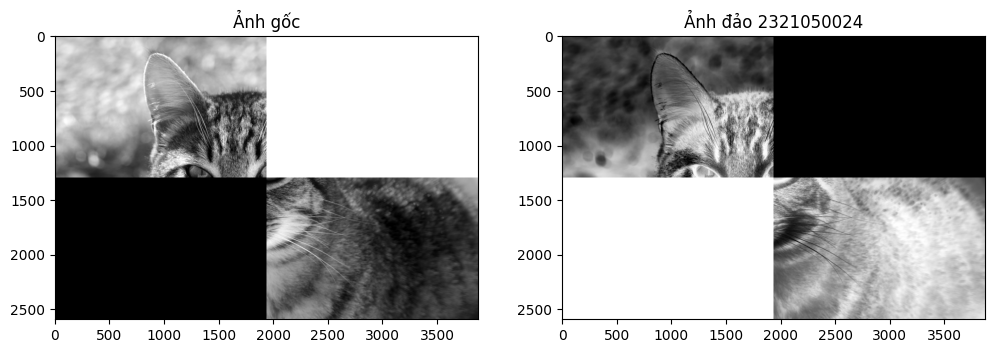

In [2]:
#Đọc ảnh xám: Pic_cat.jpg
img_cat=cv2.imread('images/pic_cat.jpg',0)


#Thực hiện Đảo ảnh: 
img_cat_dao = img_cat.max() - img_cat


#Hiển thị kết quả ảnh trước và sau khi đảo ảnh:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_cat,cmap="gray")
plt.title("Ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_cat_dao,cmap="gray")
plt.title("Ảnh đảo 2321050024")
plt.show()



In [3]:
#Pixel ảnh gốc:
img_cat

array([[199, 196, 194, ..., 255, 255, 255],
       [198, 196, 195, ..., 255, 255, 255],
       [197, 196, 196, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,  22,  20,  19],
       [  0,   0,   0, ...,  22,  21,  21],
       [  0,   0,   0, ...,  23,  23,  24]],
      shape=(2592, 3872), dtype=uint8)

In [5]:
#Pixel ảnh đảo:
img_cat_dao

array([[ 56,  59,  61, ...,   0,   0,   0],
       [ 57,  59,  60, ...,   0,   0,   0],
       [ 58,  59,  59, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 233, 235, 236],
       [255, 255, 255, ..., 233, 234, 234],
       [255, 255, 255, ..., 232, 232, 231]],
      shape=(2592, 3872), dtype=uint8)

In [6]:
# viết hàm đảo ảnh
def pic_inv(img):
    return img.max()-img

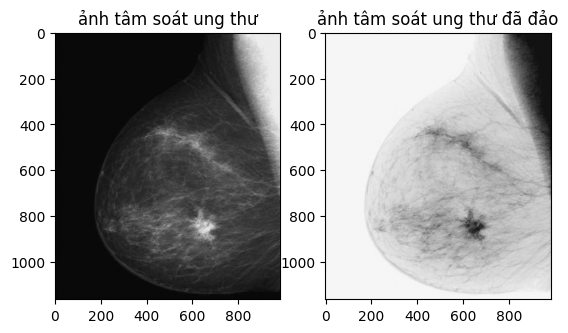

In [7]:
#Ứng dụng Đảo ảnh trong Y tế: pic_healthcare.tif
#Đọc ảnh gốc:
img_yte=cv2.imread('images/pic_healthcare.tif',0)

# thực hiện đảo ảnh
img_yte_dao= pic_inv(img_yte)
plt.subplot(1,2,2)
plt.imshow(img_yte_dao,cmap="gray")
plt.title("ảnh tâm soát ung thư đã đảo")

plt.subplot(1,2,1)
plt.imshow(img_yte,cmap="gray")
plt.title("ảnh tâm soát ung thư")
plt.show()

In [8]:
# ảnh gốc 
print(img_yte.max())

255


In [9]:
# ảnh gốc
img_yte

array([[ 38,  38,  38, ..., 238, 238, 238],
       [ 38,  38,  38, ..., 238, 238, 238],
       [ 35,  35,  35, ..., 238, 238, 238],
       ...,
       [ 31,  31,  31, ...,  30,  30,  30],
       [ 31,  31,  31, ...,  30,  30,  30],
       [ 31,  31,  31, ...,  30,  30,  30]],
      shape=(1164, 984), dtype=uint8)

In [10]:
# ảnh đảo
img_yte_dao

array([[217, 217, 217, ...,  17,  17,  17],
       [217, 217, 217, ...,  17,  17,  17],
       [220, 220, 220, ...,  17,  17,  17],
       ...,
       [224, 224, 224, ..., 225, 225, 225],
       [224, 224, 224, ..., 225, 225, 225],
       [224, 224, 224, ..., 225, 225, 225]],
      shape=(1164, 984), dtype=uint8)

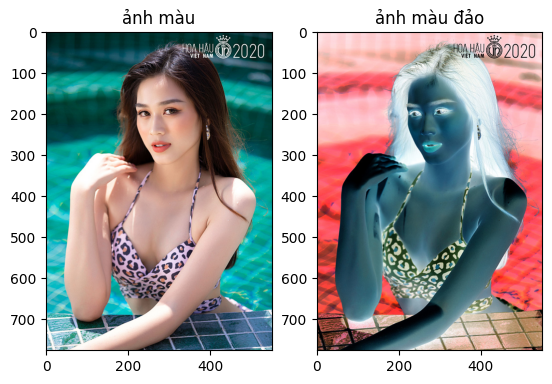

In [11]:
#Trường hợp đảo ảnh màu: pic_color.jpg
img_color=cv2.imread('images/pic_color.jpg',cv2.IMREAD_COLOR_RGB)

# đảo ảnh màu
img_color_dao=pic_inv(img_color)
plt.subplot(1,2,2)
plt.imshow(img_color_dao)
plt.title("ảnh màu đảo")
# hiển thị ảnh màu
plt.subplot(1,2,1)
plt.imshow(img_color)
plt.title("ảnh màu")
plt.show()

In [12]:
# pixel ảnh gốc
img_color[0,0]

array([ 1, 31, 29], dtype=uint8)

In [13]:
# pixel ảnh đảo
img_color_dao[0,0] 

array([254, 224, 226], dtype=uint8)

## THỰC HÀNH 2.4: 
---
**Yêu cầu 1:** Sinh viên đọc ảnh images/Thuchanh2_4.jpeg dạng ảnh xám và hiển thị ảnh

**Yêu cầu 2:** Thực hiện đảo ảnh và hiển thị kết quả. Lưu file ảnh đã đảo vào thư mục Saves/MSV_daoanh.jpg

<img src='images/Thuchanh2_4.jpeg' width='300px'>

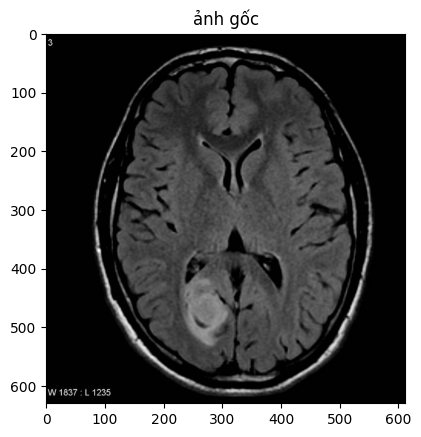

In [14]:
#{SINH VIÊN VIẾT CODE Ở ĐÂY}

img=cv2.imread("images/Thuchanh2_4.jpeg",0)

# hiển thị ảnh
plt.imshow(img,cmap="gray")
plt.title("ảnh gốc")
plt.show()






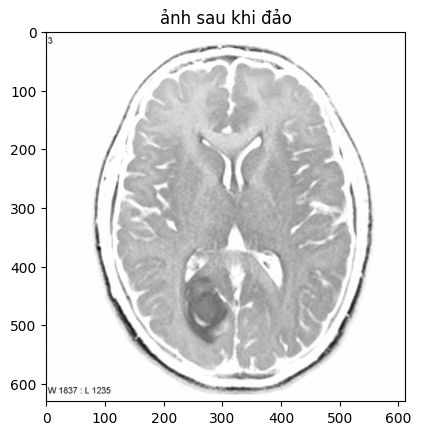

In [15]:
# đảo ảnh
img_dao = pic_inv(img)
#  hiển thị ảnh sau khi đảo
plt.imshow(img_dao, cmap="gray")
plt.title("ảnh sau khi đảo")
plt.show()

In [16]:
# lưu ảnh
cv2.imwrite("images/Saves/2321050024_daoanh.jpg",img_dao)

True

## 2.2 Biến đổi hàm mũ
---
Phép toán biến đổi ảnh bằng hàm mũ có dạng: 

**s = c * r^a**

Trong đó:
* s: điểm ảnh đã xử lý
* r: điểm ảnh ban đầu
* c,a: các hằng số

**s = c * pow(img,a)**

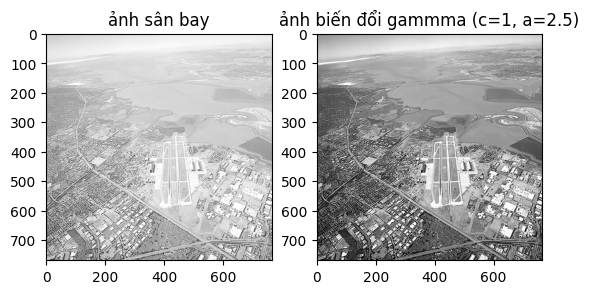

In [17]:
#Đọc ảnh gốc ở chế độ ảnh Xám: pic_sanbay.tif
img_airport = cv2.imread('images/pic_sanbay.tif',0)



#Thực hiện biến đổi ảnh với hàm mũ:
c=1
a=2.5
img_airport_gamma=c*pow(img_airport,a)
img_airport_gamma = img_airport_gamma.astype(np.int64)


#Hiển thị kết quả trước và sau khi biến đổi:
img_color_dao=pic_inv(img_color)
plt.subplot(1,2,2)
plt.imshow(img_airport_gamma,cmap="gray")
plt.title("ảnh biến đổi gammma (c=1, a=2.5)")

plt.subplot(1,2,1)
plt.imshow(img_airport,cmap="gray")
plt.title("ảnh sân bay")
plt.show()





In [18]:
#Pixel Ảnh gốc:
print(img_airport.max())
img_airport

255


array([[199, 199, 199, ..., 230, 229, 232],
       [199, 199, 200, ..., 231, 229, 231],
       [200, 200, 200, ..., 232, 229, 229],
       ...,
       [213, 213, 217, ..., 215, 208, 211],
       [199, 199, 211, ..., 198, 202, 217],
       [199, 199, 211, ..., 198, 202, 217]], shape=(769, 765), dtype=uint8)

In [19]:
#Pixel Ảnh sau biến đổi Gamma:
print(img_airport_gamma.max())
img_airport_gamma

1038365


array([[558640, 558640, 558640, ..., 802268, 793576, 819822],
       [558640, 558640, 565685, ..., 811016, 793576, 811016],
       [565685, 565685, 565685, ..., 819822, 793576, 793576],
       ...,
       [662138, 662138, 693664, ..., 677791, 623962, 646704],
       [558640, 558640, 646704, ..., 551649, 579933, 693664],
       [558640, 558640, 646704, ..., 551649, 579933, 693664]],
      shape=(769, 765))

In [20]:
#Viết hàm xử lý ảnh với hàm mũ:
def img_gamma(img, c=1, a=1):
    img_ga = c*pow(img,a)
    img_ga=img_ga.astype(np.int64)
    return img_ga



Text(0.5, 1.0, 'ảnh biến đổi gamma (c=2, a=5)')

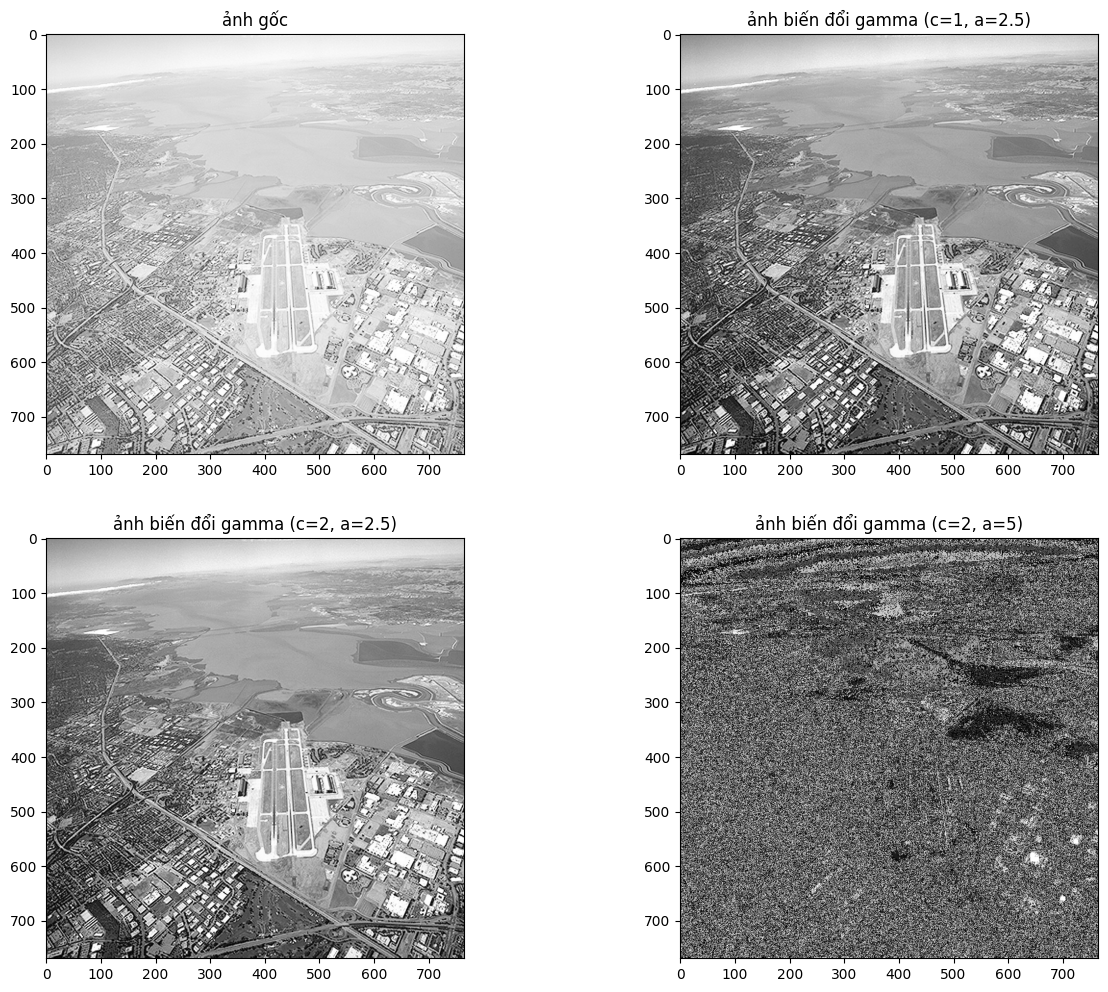

In [21]:
#Biến đổi ảnh với hàm mũ sử dụng các tham số khác nhau:
img_1=img_gamma(img_airport,1,2.5)
img_2=img_gamma(img_airport,2,2.5)
img_3=img_gamma(img_airport,2,5)

# 
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.imshow(img_airport,cmap="gray")
plt.title("ảnh gốc")

plt.subplot(2,2,2)
plt.imshow(img_1,cmap="gray")
plt.title("ảnh biến đổi gamma (c=1, a=2.5)")

plt.subplot(2,2,3)
plt.imshow(img_2,cmap="gray")
plt.title("ảnh biến đổi gamma (c=2, a=2.5)")

plt.subplot(2,2,4)
plt.imshow(img_3,cmap="gray")
plt.title("ảnh biến đổi gamma (c=2, a=5)")


## THỰC HÀNH 2.5: 
---
**Yêu cầu 1:** Sinh viên đọc ảnh images/Thuchanh2_5.jpg ở dạng xám

**Yêu cầu 2:** Thiết lập tham số c, a phù hợp để tăng cường chất lượng ảnh và hiển thị kết quả (slide). Lưu file ảnh đã  đổi vào thư mục Saves/MSV_gamma.jpg

<img src='images/Thuchanh2_5.jpg' width='300px'>

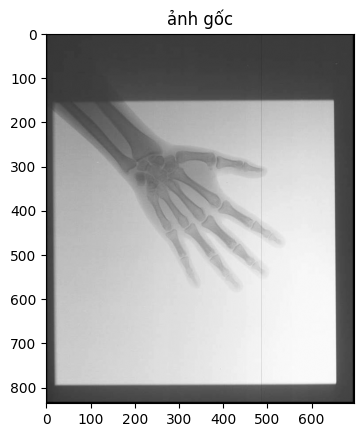

In [22]:
#{SINH VIÊN VIẾT CODE Ở ĐÂY}
img_thuchanh2_5=cv2.imread('images/Thuchanh2_5.jpg',0)

# hiển thị ảnh gốc 
plt.imshow(img_thuchanh2_5,cmap="gray")
plt.title("ảnh gốc")
plt.show()




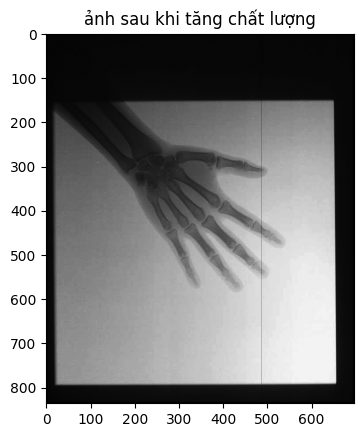

In [25]:
# tăng chất lượng ảnh
img_thuchanh2_5_gamma=img_gamma(img_thuchanh2_5,2,2.5)
plt.imshow(img_thuchanh2_5_gamma,cmap="gray")
plt.title("ảnh sau khi tăng chất lượng")
plt.show()


In [26]:
img_thuchanh2_5_gamma

array([[81992, 25683, 21527, ...,    11,     0,   362],
       [ 1466,     0,     0, ...,     0,     0,    11],
       [   11,     0,   111, ...,   362,     0,    31],
       ...,
       [    0,     0,   111, ...,   259,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [   31,    11,     2, ...,     0,    31,   111]], shape=(836, 696))

In [27]:
# lưu ảnh
cv2.imwrite("images/Saves/2321050024_gamma.jpg",img_thuchanh2_5_gamma)

True

## 2.3 Chuyển đổi sang ảnh nhị phân (cắt ngưỡng)
---
Sử dụng một ngưỡng (threshold) T để xử lý. Nếu:
* r<T thì s=0
* r>=T thì s=N (hoặc s = 1)

Ảnh là một ma trận nên có thể sử dụng các Hàm với ma trận của thư viên Numpy
- np.where(img<T, a, b): điều kiện đúng trả về a, sai trả về b

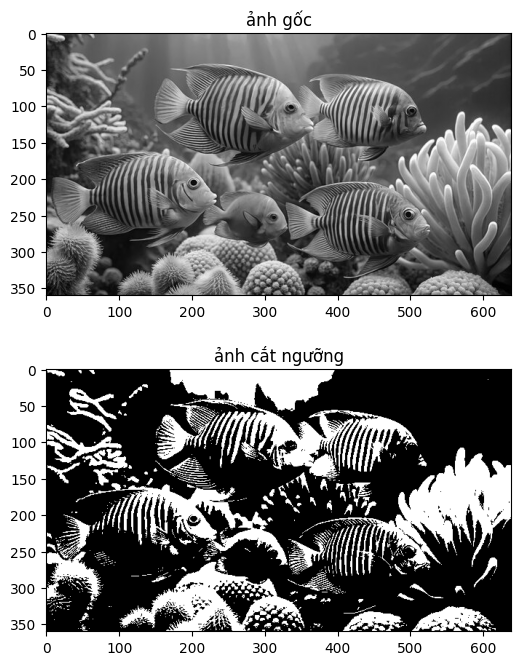

In [28]:
#Đọc ảnh xám: pic_fish.jpg
img_fish = cv2.imread('images/pic_fish.jpg',0)


#Thực hiện cắt ngưỡng ảnh:
T=127
img_fish_T= np.where(img_fish<T,0,255)


#Hiển thị kết quả trước và sau khi cắt ngưỡng:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
plt.imshow(img_fish,cmap="gray")
plt.title("ảnh gốc")

plt.subplot(2,1,2)
plt.imshow(img_fish_T,cmap="gray")
plt.title("ảnh cắt ngưỡng")
plt.show()






In [29]:
#Pixel ảnh gốc:
img_fish


array([[249, 242, 216, ...,  84,  72,  61],
       [222, 232, 229, ...,  75,  63,  54],
       [155, 167, 175, ...,  64,  54,  47],
       ...,
       [  1,   0,  21, ...,   4,   2,   1],
       [  9,   1,  38, ...,  12,  10,   7],
       [  0,  26,  20, ...,  21,  20,  16]], shape=(360, 639), dtype=uint8)

In [30]:
#Pixel ảnh sau cắt ngưỡng:
img_fish_T


array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(360, 639))

### Trong openCV cũng xây dựng phương thức thực hiện việc cắt ngưỡng: Simple Thresholding

ret,thresh1 = cv2.threshold(img,T,max,type)

trong đó:
* img: ảnh gốc
* T: giá trị ngưỡng
* max: giá trị đc gán nếu > ngưỡng T
* type: Loại xử lý cắt ngưỡng

127.0


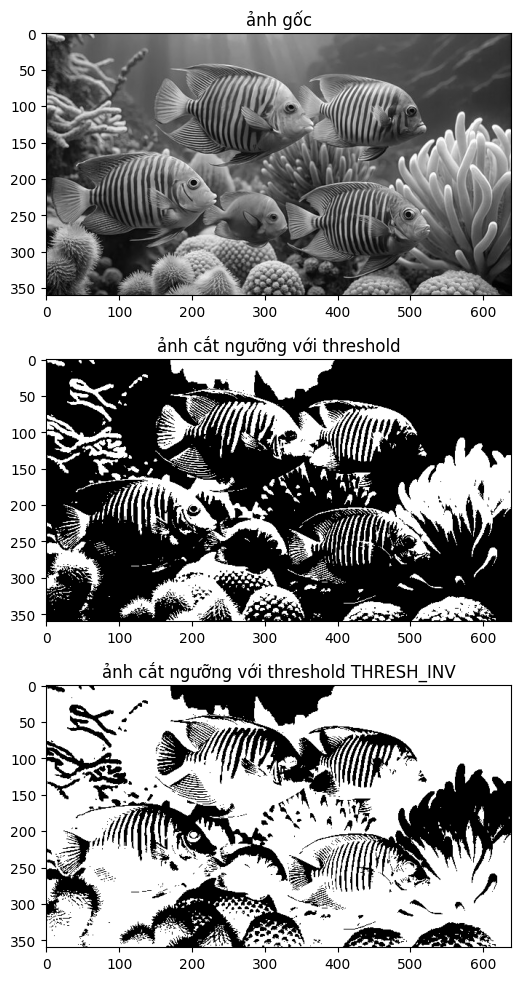

In [31]:
#Sử dụng phương thức threshold của OpenCV để cắt ngưỡng:
ret, pic = cv2.threshold(img_fish, 127,255, cv2.THRESH_BINARY)
ret, pic1 = cv2.threshold(img_fish, 127,255, cv2.THRESH_BINARY_INV)
print(ret)





#Hiển thị kết quả cắt ngưỡng với threshold:
plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.imshow(img_fish,cmap="gray")
plt.title("ảnh gốc")

plt.subplot(3,1,2)
plt.imshow(pic,cmap="gray")
plt.title("ảnh cắt ngưỡng với threshold")

plt.subplot(3,1,3)
plt.imshow(pic1,cmap="gray")
plt.title("ảnh cắt ngưỡng với threshold THRESH_INV")
plt.show()




Thuật toán sample thresholding của opencv còn có 1 tham số quan trọng là loại ngưỡng (type). opencv hỗ trợ 8 loại là: THRESH_BINARY, THRESH_BINARY_INV, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INV, THRESH_MASK, THRESH_OTSU, THRESH_TRIANGLE. Ý nghĩa của từng loại như sau:

* THRESH_BINARY: Có thể dịch là ngưỡng nhị phân. Ý nghĩa y hệt những gì đề cập ở trên.

* THRESH_BINARY_INV: Ngưỡng nhị phân đảo ngược. Có thể hiểu là nó sẽ đảo ngược lại kết quả của THRESH_BINARY.

* THRESH_TRUNC: Những giá trị điểm ảnh bé hơn ngưỡng sẽ giữ nguyên giá trị, những điểm ảnh lớn hơn hoặc bằng ngưỡng sẽ được gán lại là maxvalue.

* THRESH_TOZERO: Những điểm ảnh bé hơn ngưỡng sẽ bị gán thành 0, những điểm còn lại giữ nguyên.

* THRESH_TOZERO_INV: Những điểm ảnh nhỏ hơn giá trị ngưỡng sẽ được giữ nguyên, những điểm ảnh còn lại sẽ bị gán thành 0.

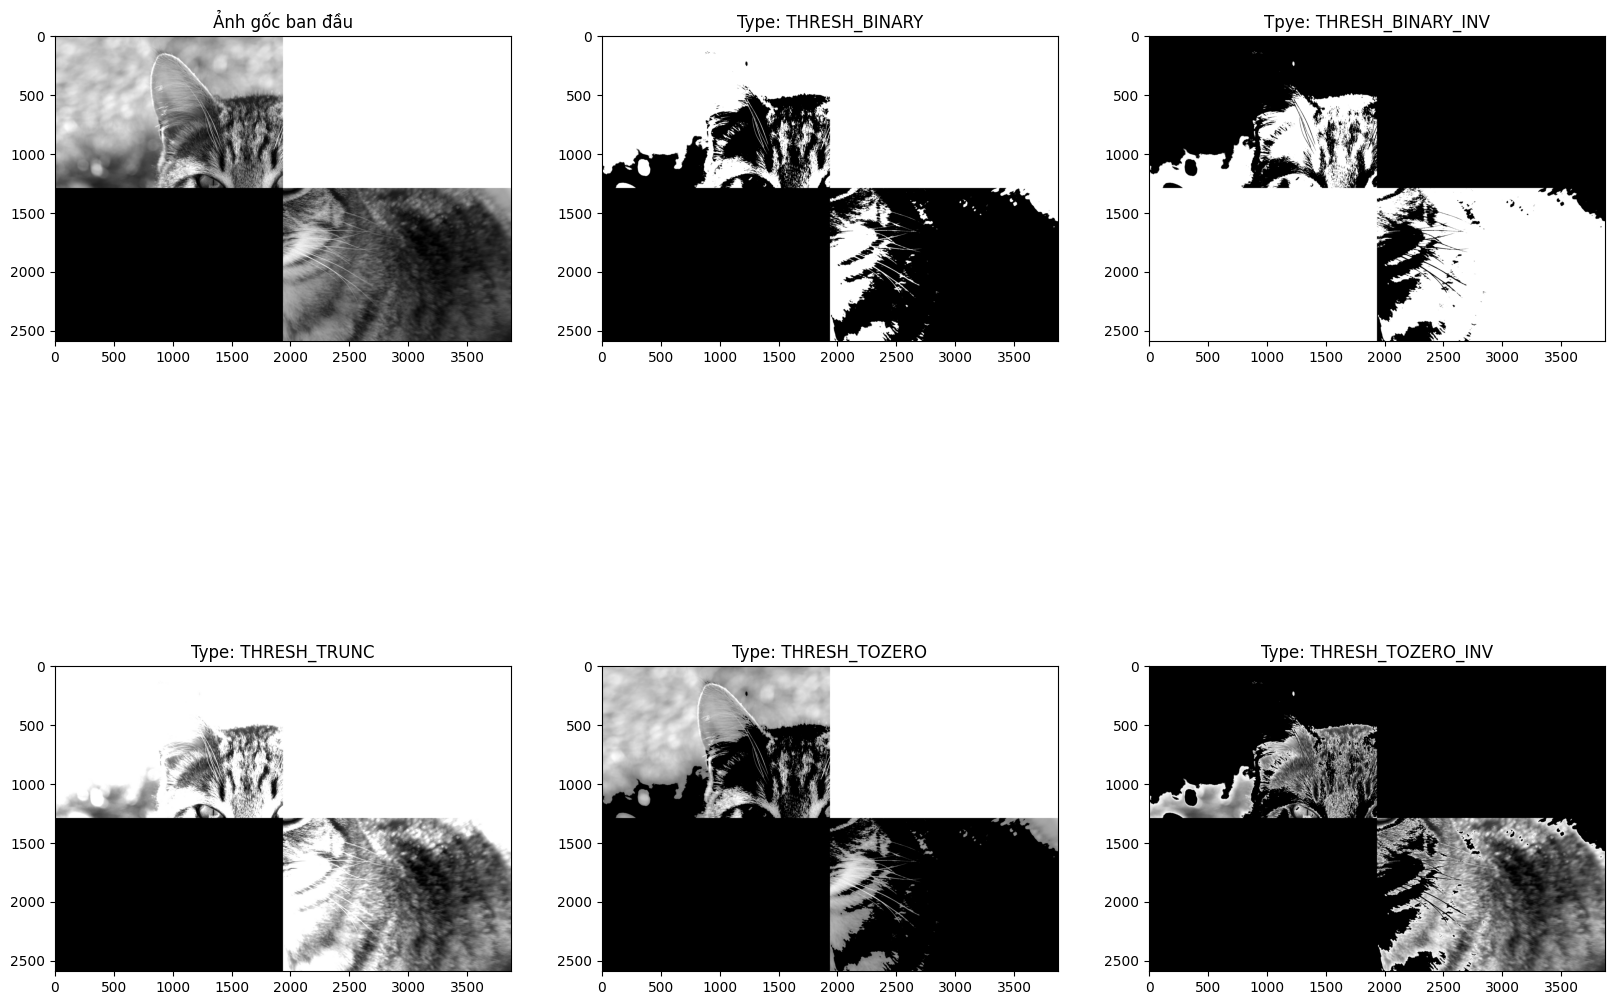

In [32]:
#Sử dụng cắt ngưỡng với các loại ngưỡng khác nhau:

img=img_cat

ret,pic1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
ret,pic2 = cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)
ret,pic3 = cv2.threshold(img,120,255,cv2.THRESH_TRUNC)
ret,pic4 = cv2.threshold(img,120,255,cv2.THRESH_TOZERO)
ret,pic5 = cv2.threshold(img,120,255,cv2.THRESH_TOZERO_INV)

#Hiển thị kết quả:
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc ban đầu')

plt.subplot(2, 3, 2)
plt.imshow(pic1, cmap='gray')
plt.title('Type: THRESH_BINARY')

plt.subplot(2, 3, 3)
plt.imshow(pic2, cmap='gray')
plt.title('Tpye: THRESH_BINARY_INV')

plt.subplot(2, 3, 4)
plt.imshow(pic3, cmap='gray')
plt.title('Type: THRESH_TRUNC')

plt.subplot(2, 3, 5)
plt.imshow(pic4, cmap='gray')
plt.title('Type: THRESH_TOZERO')

plt.subplot(2, 3, 6)
plt.imshow(pic5, cmap='gray')
plt.title('Type: THRESH_TOZERO_INV')
plt.show()


## THỰC HÀNH 2.6: 
---
**Yêu cầu 1:** Sinh viên đọc ảnh images/Thuchanh2_6.jpg ở dạng xám

**Yêu cầu 2:** Thực hiện cắt ngưỡng ảnh với (Type = cv2.THRESH_BINARY) lần lượt với T = 50, 100, 150. Hiển thị kết quả như slide minh hoạ. Lưu ảnh vào thư mục Saves

**Yêu cầu 3:** Thiết lập T = 75. Thực hiện cắt ngưỡng với Type = cv2.THRESH_TRUNC, cv2.THRESH_BINARY_INV, cv2.THRESH_TOZERO. Hiển thị kết quả như slide minh hoạ. Lưu ảnh vào thư mục Saves
<img src='images/Thuchanh2_6.jpg' width='300px'>

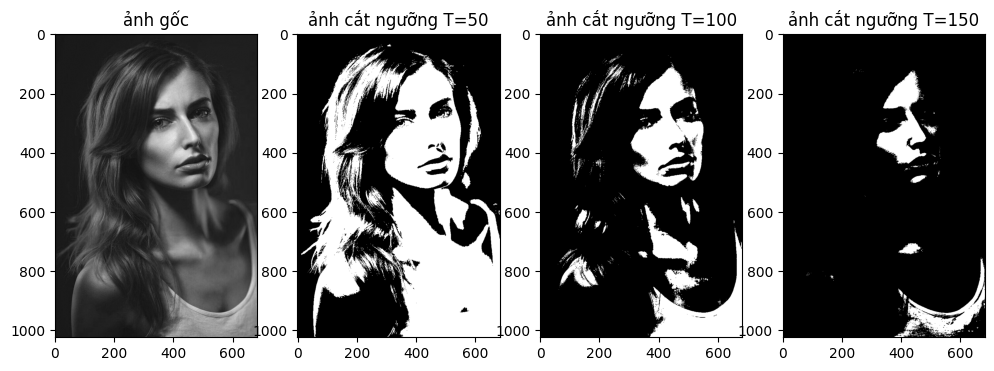

In [33]:
#{SINH VIÊN VIẾT CODE Ở ĐÂY}

img0=cv2.imread("images/Thuchanh2_6.jpg",0)

ret,img1=cv2.threshold(img0,50,255,cv2.THRESH_BINARY)
ret,img2=cv2.threshold(img0,100,255,cv2.THRESH_BINARY)
ret,img3=cv2.threshold(img0,150,255,cv2.THRESH_BINARY)

# hiển thị kết quả
plt.figure(figsize=(12,5))
plt.subplot(1,4,1),
plt.imshow(img0,cmap="gray")
plt.title("ảnh gốc")

plt.subplot(1,4,2)
plt.imshow(img1,cmap="gray")
plt.title("ảnh cắt ngưỡng T=50")

plt.subplot(1,4,3)
plt.imshow(img2,cmap="gray")
plt.title("ảnh cắt ngưỡng T=100")

plt.subplot(1,4,4)
plt.imshow(img3,cmap="gray")
plt.title("ảnh cắt ngưỡng T=150")

plt.show()





In [34]:
cv2.imwrite("images/Saves/img1.jpg",img1)
cv2.imwrite("images/Saves/img2.jpg",img2)
cv2.imwrite("images/Saves/img3.jpg",img3)


True

## 2.2 Cân bằng sáng sử dụng cân bằng Histogram (Histogram equalization)
---

* Biểu đồ Histogram của ảnh là một dạng biểu đồ biểu diễn sự phân bố của số lượng điểm ảnh tương ứng với mức độ sáng tối của bức ảnh.

* Trong đó, trục dọc biểu diễn số lượng điểm ảnh, các đỉnh càng cao thì càng có nhiều điểm ảnh ở khu vực đó và độ chi tiết càng nhiều.
* Trục ngang tính từ trái qua phải với mốc giá trị từ 0 đến 255 biểu diễn độ sáng của mỗi khu vực ảnh. Gốc giá trị 0 được coi là tối nhất tựa như màu đen tuyền trong khi càng dịch sang phải giá trị này càng tăng, ngọn sáng nhất của ánh sáng ở giá trị 255.

Để tính được Histogram của một ảnh, ta có thể dùng một trong các hàm sau:

* cv2.calcHist() - https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html
* plt.hist() - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

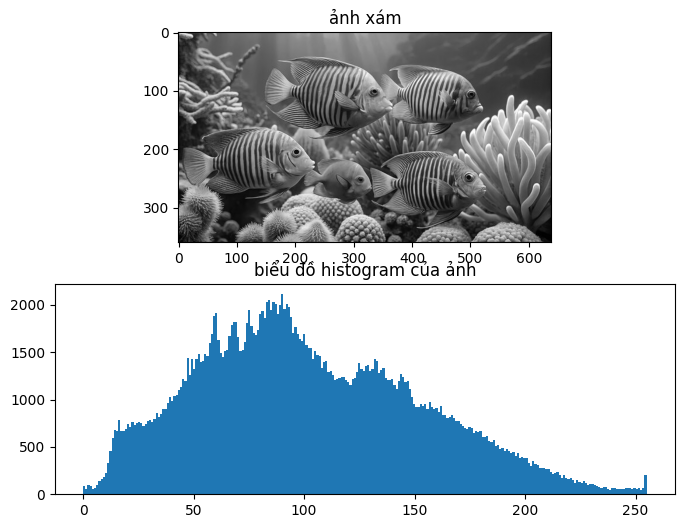

In [35]:
#Đọc ảnh Xám: pic_fish.jpg
img_gray=img_fish


#Hiển thị ảnh và histogram của ảnh:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.imshow(img_fish,cmap="gray")
plt.title("ảnh xám")

plt.subplot(2,1,2)
plt.hist(img_gray.ravel(),256)
plt.title("biểu đồ histogram của ảnh")
plt.show()

In [36]:
#Xác định số điểm ảnh có giá trị từ 0 --> 255
unique_values, counts = np.unique(img_gray, return_counts=True)
for val, count in zip(unique_values, counts):
    print(f"Giá trị {val}: xuất hiện {count} lần")

Giá trị 0: xuất hiện 90 lần
Giá trị 1: xuất hiện 53 lần
Giá trị 2: xuất hiện 94 lần
Giá trị 3: xuất hiện 84 lần
Giá trị 4: xuất hiện 55 lần
Giá trị 5: xuất hiện 63 lần
Giá trị 6: xuất hiện 99 lần
Giá trị 7: xuất hiện 136 lần
Giá trị 8: xuất hiện 162 lần
Giá trị 9: xuất hiện 182 lần
Giá trị 10: xuất hiện 228 lần
Giá trị 11: xuất hiện 327 lần
Giá trị 12: xuất hiện 457 lần
Giá trị 13: xuất hiện 593 lần
Giá trị 14: xuất hiện 682 lần
Giá trị 15: xuất hiện 668 lần
Giá trị 16: xuất hiện 781 lần
Giá trị 17: xuất hiện 672 lần
Giá trị 18: xuất hiện 669 lần
Giá trị 19: xuất hiện 690 lần
Giá trị 20: xuất hiện 743 lần
Giá trị 21: xuất hiện 709 lần
Giá trị 22: xuất hiện 766 lần
Giá trị 23: xuất hiện 731 lần
Giá trị 24: xuất hiện 751 lần
Giá trị 25: xuất hiện 763 lần
Giá trị 26: xuất hiện 749 lần
Giá trị 27: xuất hiện 724 lần
Giá trị 28: xuất hiện 745 lần
Giá trị 29: xuất hiện 769 lần
Giá trị 30: xuất hiện 788 lần
Giá trị 31: xuất hiện 768 lần
Giá trị 32: xuất hiện 797 lần
Giá trị 33: xuất hiện 861 l

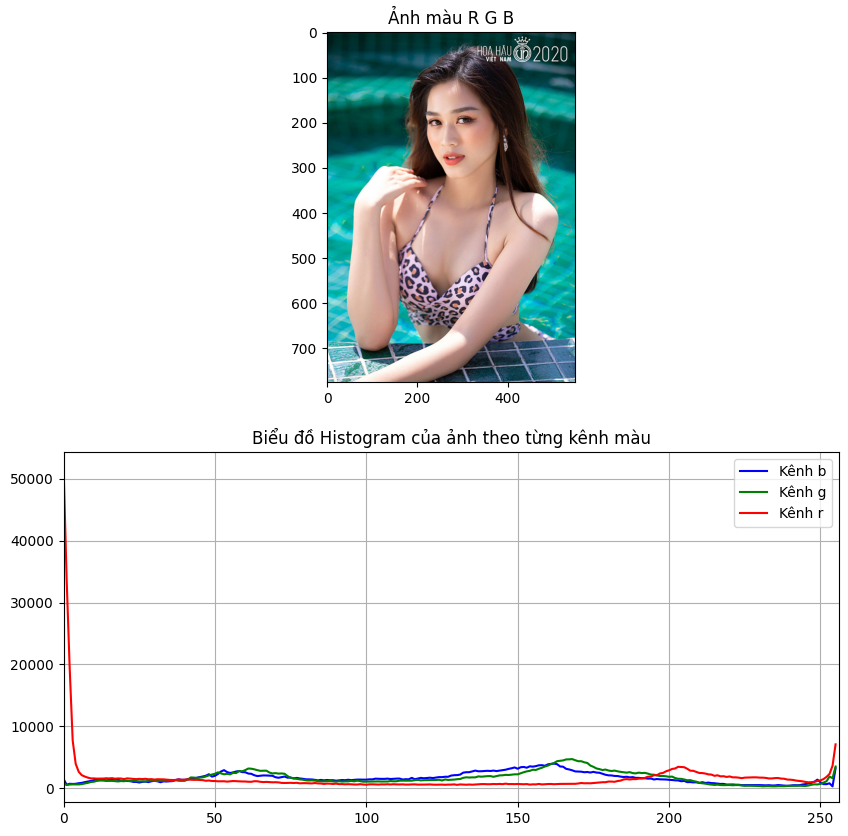

In [37]:
#Đọc ảnh và xem Histogram của ảnh màu
img_color= cv2.imread('images/pic_color.jpg')

#Hiển thị kết quả:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB))
plt.title('Ảnh màu R G B')

#Đối với ảnh màu, ta có thể xem Histogram của từng kênh màu
plt.subplot(2, 1, 2)
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img_color],[i],None,[256],[0,256])
    plt.plot(histr,color = col,label = 'Kênh ' + col)
    plt.xlim([0,256])
plt.title('Biểu đồ Histogram của ảnh theo từng kênh màu')
plt.legend()
plt.grid()

plt.show()

### Dựa vào Histogram có thể biết được bức ảnh là tối (dark) hay sáng (bright).
---


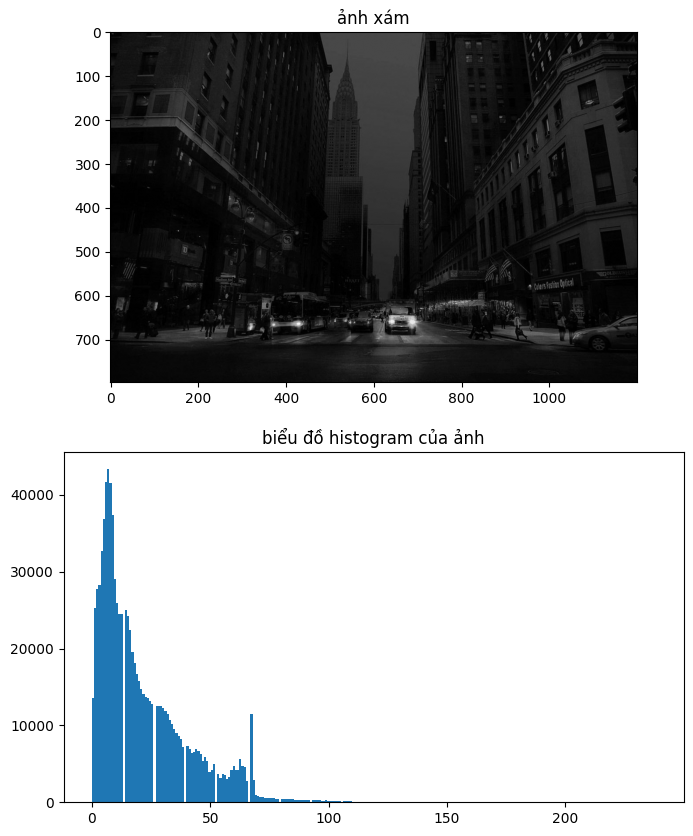

In [38]:
#Đọc ảnh pic1.jpg và hiển thị biểu đồ histogram:
img_D=cv2.imread('images/pic1.jpg',0)

plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.imshow(img_D,cmap="gray")
plt.title("ảnh xám")

plt.subplot(2,1,2)
plt.hist(img_D.ravel(),256)
plt.title("biểu đồ histogram của ảnh")
plt.show()





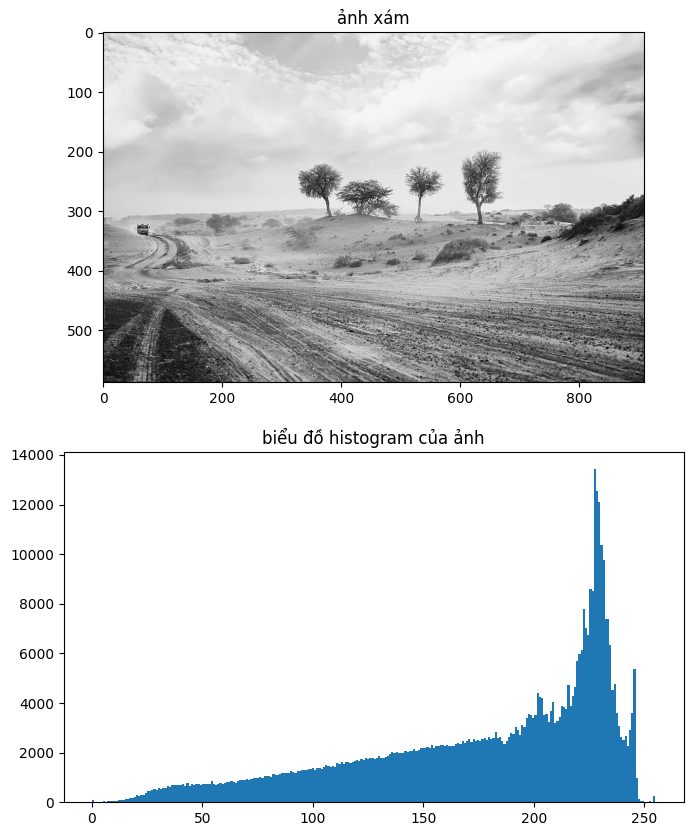

In [39]:
#Đọc ảnh pic2 và hiển thị biểu đồ histogram:
img_B=cv2.imread('images/pic2.jpg',0)

plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.imshow(img_B,cmap="gray")
plt.title("ảnh xám")

plt.subplot(2,1,2)
plt.hist(img_B.ravel(),256)
plt.title("biểu đồ histogram của ảnh")
plt.show()




### Thực hiện cân bằng sáng 
---
OpenCV hỗ trợ hàm:

cv2.equalizeHist() để cân bằng sáng. 

Trên ảnh gray sử dụng trực tiếp phương thức cv2.equlizeHist() để cân bằng trên toàn bộ ảnh. (ko có tác dụng khi cân bằng sáng cho ảnh nhị phân)

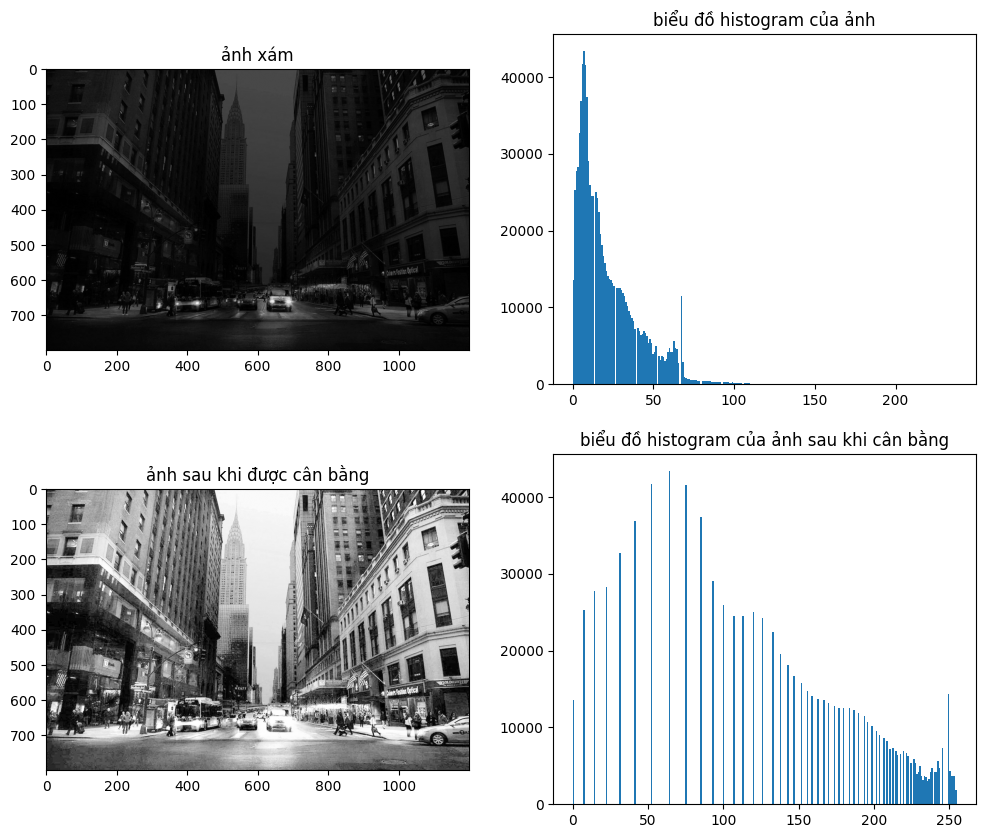

In [40]:
#Thực hiện cân bằng sáng với ảnh Tối:
img_D_hist=cv2.equalizeHist(img_D)

# hiển thị kết quả
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(img_D,cmap="gray")
plt.title("ảnh xám")

plt.subplot(2,2,2)
plt.hist(img_D.ravel(),256)
plt.title("biểu đồ histogram của ảnh")

plt.subplot(2,2,3)
plt.imshow(img_D_hist, cmap="gray")
plt.title("ảnh sau khi được cân bằng")

plt.subplot(2,2,4)
plt.hist(img_D_hist.ravel(),256)
plt.title("biểu đồ histogram của ảnh sau khi cân bằng")
plt.show()




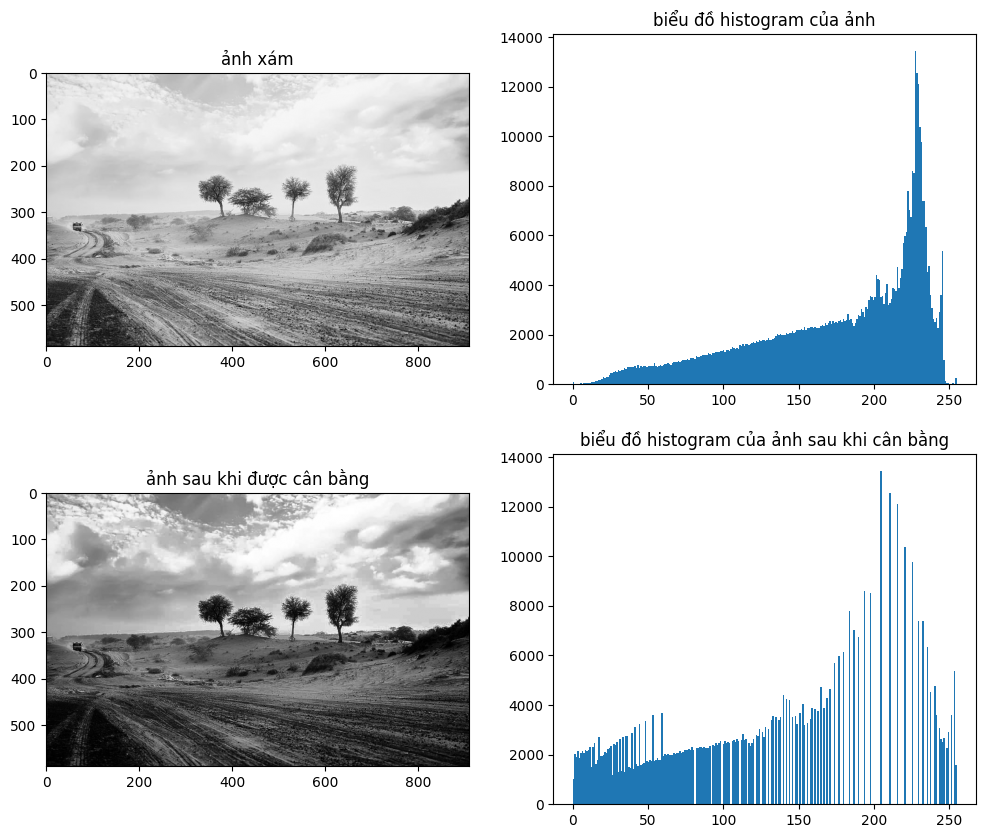

In [41]:
#Thực hiện cân bằng sáng với ảnh Sáng:
img_B_hist=cv2.equalizeHist(img_B)

# hiển thị kết quả
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(img_B,cmap="gray")
plt.title("ảnh xám")

plt.subplot(2,2,2)
plt.hist(img_B.ravel(),256)
plt.title("biểu đồ histogram của ảnh")

plt.subplot(2,2,3)
plt.imshow(img_B_hist, cmap="gray")
plt.title("ảnh sau khi được cân bằng")

plt.subplot(2,2,4)
plt.hist(img_B_hist.ravel(),256)
plt.title("biểu đồ histogram của ảnh sau khi cân bằng")
plt.show()







**Để cân bằng sáng trên ảnh màu:**
* Convert sang không gian YUV, trong đó Y là độ sáng (luma hay brightness), U và V là kênh màu.
* Áp dụng equalizeHist trên kênh Y
* Convert trở về RGB (hoặc BGR tuỳ ảnh gốc)


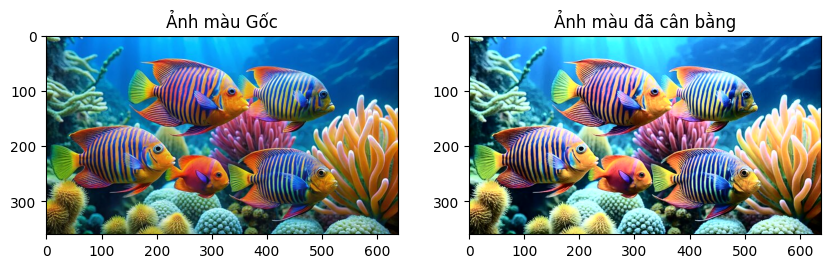

In [ ]:
#Đọc ảnh màu:
img_bgr = cv2.imread('images/pic_fish.jpg')

#Chuyển đổi từ hệ màu BGR sang YUV:
img_yuv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2YUV)

#Cân bằng sáng trên kênh Y:
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

#chuyển đổi ngược ảnh đã cân bằng từ hệ YUV  về BGR:
img_bgr2 = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)

#Hiển thị ảnh gốc và ảnh đã cân bằng sáng:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB))
plt.title('Ảnh màu Gốc')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_bgr2,cv2.COLOR_BGR2RGB))
plt.title('Ảnh màu đã cân bằng')

plt.show()

## THỰC HÀNH 2.7: 
---

* Yêu cầu 1: Sinh viên đọc ảnh images/Thuchanh2_6.jpg ở dạng ảnh xám. Thực hiện cân bằng sáng trên ảnh Xám, hiển thị ảnh gốc và ảnh sau cần bằng cùng với Histogram tương ứng của mỗi ảnh.
* Yêu cầu 2: Sinh viên đọc ảnh images/Thuchanh2_6.jpg ở dạng ảnh màu. Thực hiện cân bằng sáng trên ảnh màu, hiển thị ảnh gốc và ảnh sau cần bằng ở dạng ảnh màu.
* Yêu cầu 3: Lưu ảnh xám và ảnh màu đã cân bằng vào thư mục images/Saves.

<img src = 'images/Thuchanh2_6.jpg' width='150px'>

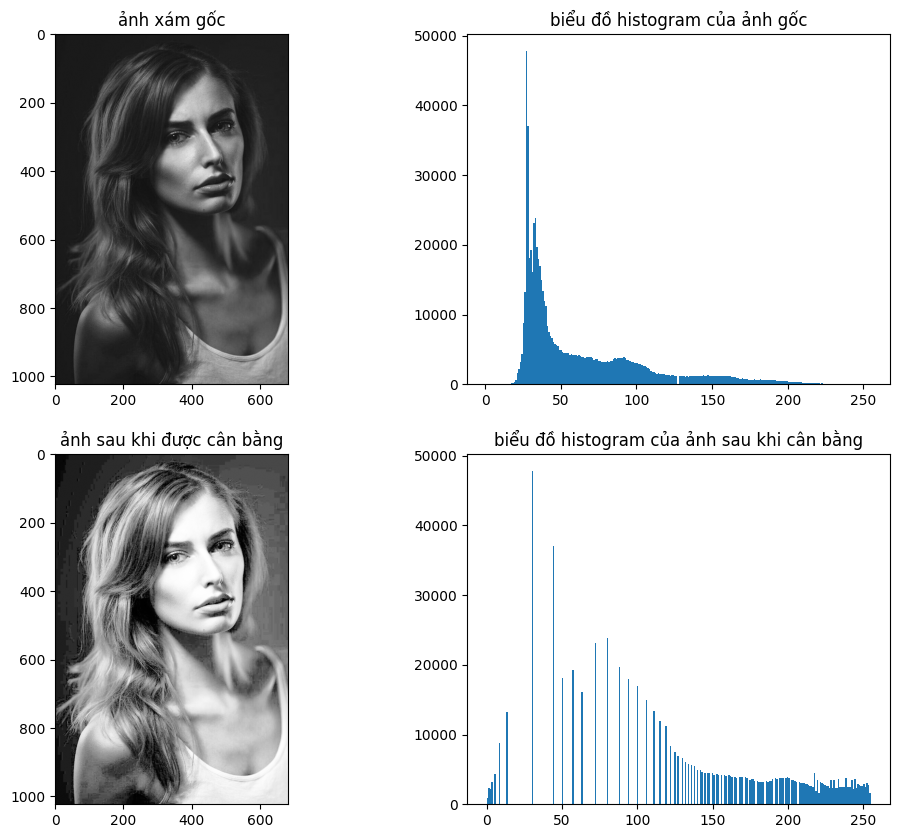

In [2]:
#{SINH VIÊN VIẾT CODE Ở ĐÂY}
# đọc ảnh
img_thuchanh2_6=cv2.imread("images/Thuchanh2_6.jpg",0)

# cân bằng màu
img_thuchanh2_6_hist=cv2.equalizeHist(img_thuchanh2_6)

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(img_thuchanh2_6,cmap="gray")
plt.title("ảnh xám gốc")

plt.subplot(2,2,2)
plt.hist(img_thuchanh2_6.ravel(),256)
plt.title("biểu đồ histogram của ảnh gốc")

plt.subplot(2,2,3)
plt.imshow(img_thuchanh2_6_hist, cmap="gray")
plt.title("ảnh sau khi được cân bằng")

plt.subplot(2,2,4)
plt.hist(img_thuchanh2_6_hist.ravel(),256)
plt.title("biểu đồ histogram của ảnh sau khi cân bằng")
plt.show()






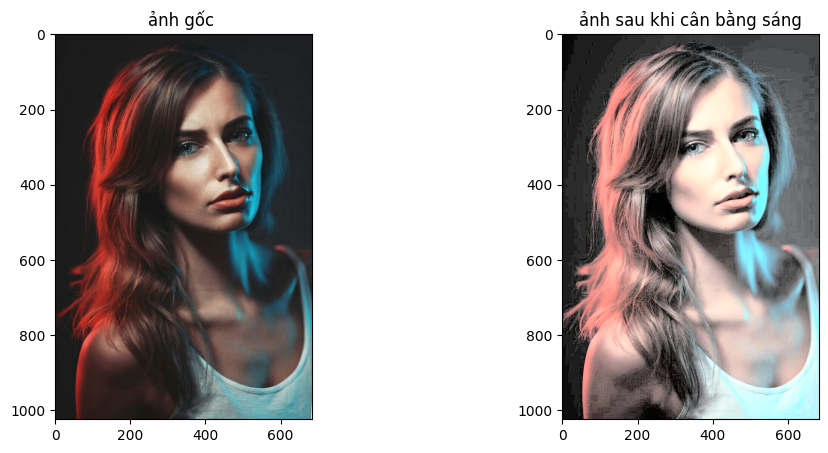

In [7]:
# đọc ảnh
img_thuchanh2_6=cv2.imread('images/Thuchanh2_6.jpg')

# chuyển sang hệ màu YUV
img_thuchanh2_6_YUV=cv2.cvtColor(img_thuchanh2_6,cv2.COLOR_BGR2YUV)

# Cân bằng sáng
img_thuchanh2_6_YUV[:,:,0]=cv2.equalizeHist(img_thuchanh2_6_YUV[:,:,0])

# hiển thị
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_thuchanh2_6,cv2.COLOR_BGR2RGB))
plt.title("ảnh gốc ")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_thuchanh2_6_YUV,cv2.COLOR_YUV2RGB))
plt.title("ảnh sau khi cân bằng sáng")

plt.show()

### Note: Equalize Histogram:
---
Tuy nhiên không phải lúc nào Equalize Histogram toàn bộ ảnh cũng giúp đạt kết quả mong muốn

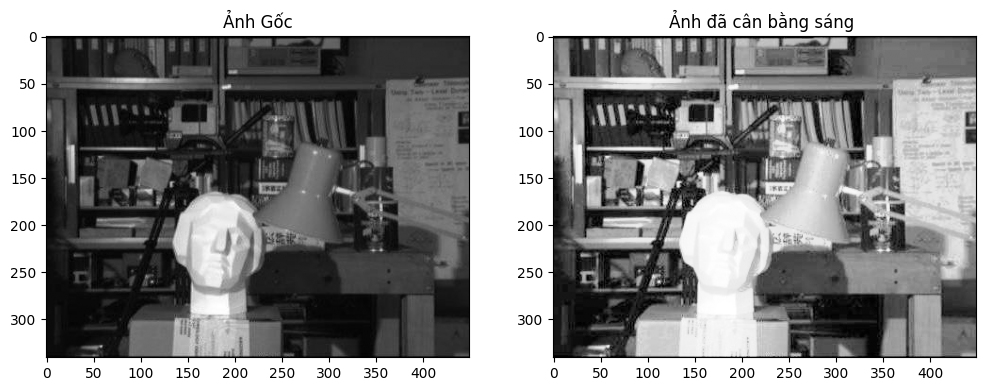

In [8]:
#Đọc ảnh xám:
img_25 = cv2.imread('images/pic_statue.jpg',0)

#Thực hiện cân bằng sáng với phương thức equalizeHist():
img_equ2 = cv2.equalizeHist(img_25)

#Hiển thị ảnh và Histogram tương ứng.
#Ảnh 1
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img_25, cmap='gray')
plt.title('Ảnh Gốc')

plt.subplot(1, 2, 2)
plt.imshow(img_equ2, cmap='gray')
plt.title('Ảnh đã cân bằng sáng ')
plt.show()

Để giải quyết trường hợp này, ta cần dùng một phương pháp Histogram Equalization đặc biệt. Ảnh sẽ được chia thành các khối viên gạch "tiles" nhỏ (tileSize default của OpenCV là 8x8). Sau đó mỗi khối này được Equalize Histogram riêng. Nhờ đó histogram sẽ chỉ giới hạn trong một vùng nhỏ.

Thư viện OpenCV cung cấp hàm: CLAHE (Contrast Limited Adaptive Histogram Equalization)

cv2.createCLAHE() - https://docs.opencv.org/3.3.0/d7/dbd/group__imgproc.html#gad689d2607b7b3889453804f414ab1018

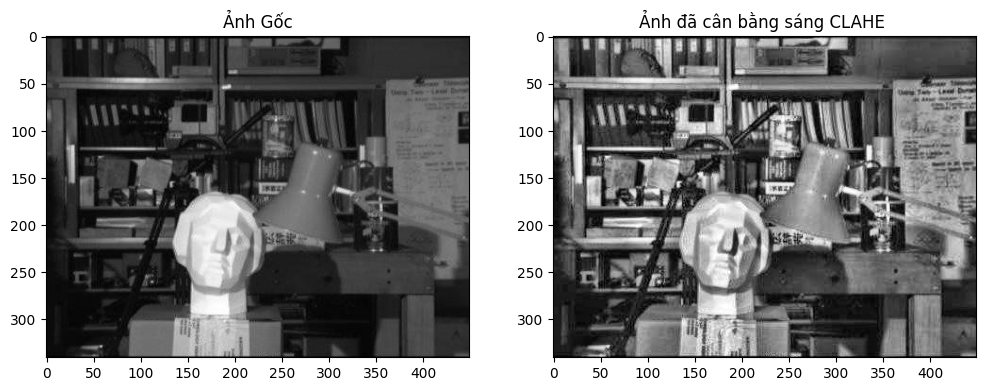

In [9]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(15,15))
img_clahe = clahe.apply(img_25)

#Hiển thị ảnh:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img_25, cmap='gray')
plt.title('Ảnh Gốc')

plt.subplot(1, 2, 2)
plt.imshow(img_clahe, cmap='gray')
plt.title('Ảnh đã cân bằng sáng CLAHE ')
plt.show()

### Yêu cầu 4: Đọc ảnh Thuchanh2_6.jpg ở dạng ảnh Xám.
- Thực hiện cân bằng sáng toàn ảnh, cân bằng theo từng vùng 15x15.
- Hiển thị 3 ảnh: Ảnh gốc - Ảnh cân bằng toàn ảnh - Ảnh cân bằng theo vùng 15x15.


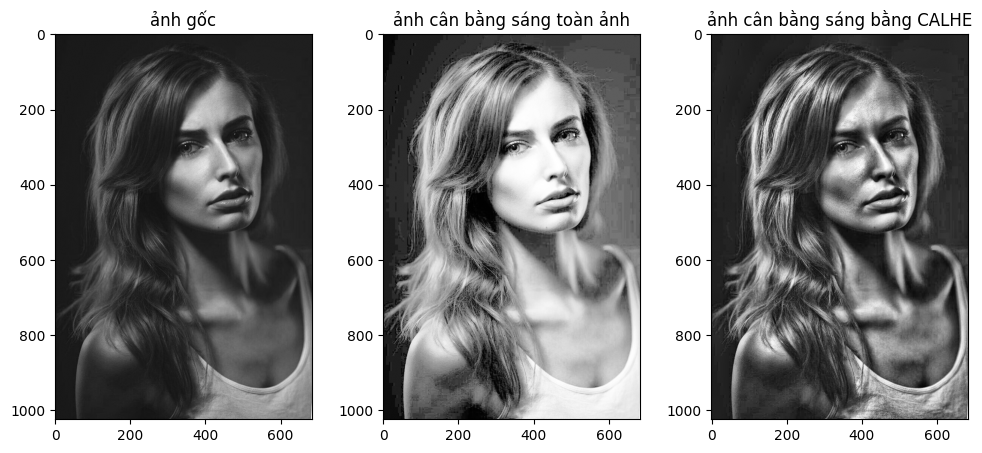

In [11]:
# đọc ảnh
img_thuchanh2_6=cv2.imread("images/Thuchanh2_6.jpg",0)

# cân bằng sáng toàn ảnh
img_thuchanh2_6_hist=cv2.equalizeHist(img_thuchanh2_6)





# cân bằng sáng theo từng vùng
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(15,15))
img_thuchanh2_6_CLAHE=clahe.apply(img_thuchanh2_6)

# hiển thị ảnh
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(img_thuchanh2_6,cmap="gray")
plt.title("ảnh gốc")

plt.subplot(1,3,2)
plt.imshow(img_thuchanh2_6_hist,cmap="gray")
plt.title("ảnh cân bằng sáng toàn ảnh")

plt.subplot(1,3,3)
plt.imshow(img_thuchanh2_6_CLAHE,cmap="gray")
plt.title("ảnh cân bằng sáng bằng CALHE")

plt.show()
